# Veri Bilimi Çalışma Soruları


Veri seti: [Titanic](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

## Kolay Sorular

**Soru 1**: `Embarked` sütununda kaç tane eksik veri olduğunu bulun.

In [ ]:
import pandas as pd
df = pd.read_csv("http://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
df['Embarked'].isna().sum()

np.int64(2)

**Soru 2**: `Cabin` sütunundaki eksik verileri 'Unknown' ile doldurun ve sonucu yeni bir sütun (`Cabin_filled`) olarak kaydedin.

In [ ]:
df['Cabin_filled'] = df['Cabin'].fillna("Unknown")
df['Cabin'].isna().sum()

np.int64(687)

**Soru 3**: `Age` sütunundaki eksik verileri ortalama yaş ile doldurun.

In [ ]:
mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean) # ben karşılaştırmalı yapmadığım için aynı sütunda uyguladım

**Soru 4**: `Pclass` sütununu kategorik veri tipine (`category`) dönüştürün.

In [ ]:
df['Pclass'] = df['Pclass'].astype('category')

**Soru 5**: `Sex` sütunundaki benzersiz değerleri listeleyin.

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

**Soru 6**: `Sex` sütununu LabelEncoder kullanarak sayısal değerlere dönüştürün (`male=0`, `female=1`).

In [ ]:
#le = LabelEncoder()
#df['Sex_encoded'] = le.fit_transform(df['Sex'])
#print(le.classes_) # bu şekilde denediğim zaman istenen sonucu alamadım yapay zekaya sordum map yöntemiyle özel bir yerleştirme yapmak daha doğru dedi. reverse veya 1-x ile ters çevirmeyi denedim ama çalışmadı
#map yöntemini de yazıyorum

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df['Sex_temp'] = df['Sex'].map({'male': 'a', 'female': 'b'})  # 'a' alfabetik olarak önce gelir
df['Sex_encoded'] = le.fit_transform(df['Sex_temp'])
df = df.drop(columns='Sex_temp')
df.groupby('Sex')['Sex_encoded'].unique()  #geçici bir sütun oluşturup map ile a ve b kullanarak önceki sırayı tersine çevirdik
#daha sonra df.drop ile geçici kolonu sildim

,Sex_encoded
Sex,
female,[1]
male,[0]


**Soru 7**: `Name` sütunundaki değerleri küçük harfe çevirin ve yeni bir sütun (`Name_lower`) oluşturun.

In [ ]:
#df['Name_lower'] = df['Name'].lower()
#df['Name_lower'].head()

# ilk denediğimde böyle yapmıştım ama lower fonk. sadece stringlere uygulanabildiğini unutmuştum, doğrusu:
df['Name_lower'] = df['Name'].str.lower()
df['Name_lower'].head()

,Name_lower
0,"braund, mr. owen harris"
1,"cumings, mrs. john bradley (florence briggs th..."
2,"heikkinen, miss. laina"
3,"futrelle, mrs. jacques heath (lily may peel)"
4,"allen, mr. william henry"


**Soru 8**: `Fare` sütununu MinMaxScaler ile [0,1] aralığına normalleştirin.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
minmax = MinMaxScaler()
df['Fare_minmax'] = minmax.fit_transform(df[['Fare']])
df[['Fare','Fare_minmax']].head()


,Fare,Fare_minmax
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713


**Soru 9**: `Ticket` sütununda yalnızca rakamlardan oluşan değerleri bulun (`str.isdigit`).

In [ ]:
df['Is_Digit'] = df['Ticket'].str.isdigit()
df[['Ticket', 'Is_Digit']].head()

,Ticket,Is_Digit
0,A/5 21171,False
1,PC 17599,False
2,STON/O2. 3101282,False
3,113803,True
4,373450,True


**Soru 10**: `Age` sütununu StandardScaler ile standardize edin (ortalama 0, standart sapma 1).

In [ ]:
std = StandardScaler()
df['Age_scaled'] = std.fit_transform(df[['Age']])
df[['Age_scaled']].head()

,Age_scaled
0,-0.592481
1,0.638789
2,-0.284663
3,0.407926
4,0.407926


## Orta Düzey Sorular

**Soru 11**: `Age` sütunundaki eksik verileri, `Pclass` gruplarına göre medyan ile doldurun.

In [ ]:
med = df.groupby('Pclass')['Age'].median()
df['Age'] = df['Age'].fillna(df['Pclass'].map(med)) # ben başlangıçta fillna parametresine direkt med yazmıştım yanlışmış, map ile kullanmam gerekiyormuş
df['Age'].isna().sum()

/tmp/ipython-input-101-1008482498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med = df.groupby('Pclass')['Age'].median()


np.int64(0)

**Soru 12**: `Fare` sütununda IQR yöntemiyle aykırı değerleri tespit edin ve aykırı olan satırların indekslerini listeleyin.

In [ ]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr # alt sınır
upper = q3 + 1.5 * iqr # üst sınır

outlier = (df['Fare'] < lower) | (df['Fare'] > upper) # burada true false değeri atadık diye anladım
outlier_index= df[outlier].index

print(outlier_index)

# ben başlangıçta outlier kısmını değişken olarak değil df'de yeni bir kolon olarak yapmayı denemiştim ama df[değişken] olarak yapmamız daha kolay oluyor. df[değişken] = df[koşul] olduğu için.

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
      dtype='int64', length=116)


**Soru 13**: `Embarked` sütununu one-hot encoding ile kodlayın ve dummy tuzağını önlemek için bir sütunu silin.

In [ ]:
df_dummy = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first=True) # drop_first=True → ilk kategori (örneğin "S") düşürülür
df = pd.concat([df, df_dummy], axis=1) # Orijinal df ile yeni oluşturulan df_dummy'yi yanyana birleştirir
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_filled,Sex_encoded,Name_lower,Fare_minmax,Is_Digit,Age_scaled,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Unknown,0,"braund, mr. owen harris",0.014151,False,-0.592481,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,1,"cumings, mrs. john bradley (florence briggs th...",0.139136,False,0.638789,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Unknown,1,"heikkinen, miss. laina",0.015469,False,-0.284663,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,1,"futrelle, mrs. jacques heath (lily may peel)",0.103644,True,0.407926,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Unknown,0,"allen, mr. william henry",0.015713,True,0.407926,False,True


**Soru 14**: `Name` sütununda 'Miss.' içeren satırları filtreleyin ve yeni bir sütun (`Is_Miss`) oluşturun (1: Miss, 0: Değil).

In [ ]:
df['Is_Miss'] = df['Name'].str.contains('Miss.', na=False).astype(int)

**Soru 15**: `Ticket` sütunundaki değerlerin başındaki ve sonundaki boşlukları kaldırın (`str.strip`).

In [ ]:
df['Ticket'] = df['Ticket'].str.strip()

**Soru 16**: `Age` sütununda Z-Score yöntemiyle (|Z| > 3) aykırı değerleri tespit edin.

In [ ]:
from scipy.stats import zscore  # burada yapay zeka ile yaptım
df['Age_zscore'] = zscore(df['Age'], nan_policy='omit') # nan_policy='omit' → eksik (NaN) değerleri dışlar
z_outliers = df[abs(df['Age_zscore']) > 3]
print(z_outliers.index)


Index([96, 116, 493, 630, 672, 745, 851], dtype='int64')


**Soru 17**: `Sex` ve `Embarked` sütunlarını birleştirerek yeni bir özellik oluşturun (ör. `male_S`, `female_Q`) ve `zip` fonksiyonunu kullanın.

In [ ]:
combined = list(zip(df['Sex'], df['Embarked']))
df['Sex_Embarked'] = pd.Series([f"{sex}_{emb}" for sex, emb in combined])

**Soru 18**: `Embarked` sütunundaki eksik verileri mod ile doldurun.

In [ ]:
# mode = df['Embarked'].mode() başta böyle yapmştım ama yanlışmış Çünkü mode() fonksiyonu birden fazla moda (mod değere) sahip olabilir ve sonuç bir Series döndürür. Pandas tüm satırlara bu Series'i koymaya çalışır → bu da uyumsuzluk yaratır.
mode = df['Embarked'].mode()[0]
df['Embarked_fill'] = df['Embarked'].fillna(mode)
df.loc[df['Embarked'].isna(), ['Embarked', 'Embarked_fill']]

,Embarked,Embarked_fill
61,NaN,S
829,NaN,S


**Soru 19**: `Name` sütununda virgül (`,`) karakterini nokta (`.`) ile değiştirin (`str.replace`).

In [ ]:
df['Name'] = df['Name'].str.replace(',', '.', regex=False)


**Soru 20**: `Fare` sütununda negatif veya sıfır değerleri kontrol edin ve bunları medyan ile değiştirin.

In [ ]:
fare_median = df[df['Fare'] > 0]['Fare'].median()
df.loc[df['Fare'] <= 0, 'Fare'] = fare_median

## İleri Düzey Sorular

**Soru 21**: `Age` sütunundaki eksik verileri, `Pclass` ve `Sex` kombinasyonlarına göre medyan ile doldurun.

In [ ]:
median_values = df.groupby(['Pclass', 'Sex'])['Age'].median()
df['Age'] = df.apply(lambda row: median_values[row['Pclass'], row['Sex']] if pd.isna(row['Age']) else row['Age'], axis=1)

/tmp/ipython-input-111-3224766034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df.groupby(['Pclass', 'Sex'])['Age'].median()


**Soru 22**: `Fare` sütunundaki aykırı değerleri IQR yöntemiyle tespit edin ve bunları Q1 - 1.5*IQR ve Q3 + 1.5*IQR sınırlarıyla sınırlandırın (`clip`).

In [ ]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df['Fare'] = df['Fare'].clip(lower=lower, upper=upper)


**Soru 23**: `Embarked` sütununu hedef (`Survived`) bazlı kodlayın (target encoding) ve yeni bir sütun (`Embarked_target`) oluşturun.

In [ ]:
target_mean = df.groupby('Embarked')['Survived'].mean()
df['Embarked_target'] = df['Embarked'].map(target_mean)

**Soru 24**: `Name` sütunundan unvanları (ör. Mr., Mrs., Miss.) çıkarın ve yeni bir sütun (`Title`) oluşturun (`str.extract` ile regex kullanın). Yeni oluşturulan Title sütunu yolcunun sadece unvanını içermeli.

In [ ]:
target_mean = df.groupby('Embarked')['Survived'].mean()
df['Embarked_target'] = df['Embarked'].map(target_mean)

**Soru 25**: `Age` sütununu üç gruba ayırın (çocuk: <18, yetişkin: 18-60, yaşlı: >60) ve `lambda` fonksiyonu kullanarak yeni bir sütun (`Age_Group`) oluşturun. Kodlama ile yapılabileceği gibi `cut`, `qcut` fonksiyonlarının araştırılması ve bu fonskyionlardan uygun olanın kullanılması istenmektedir.

In [ ]:
bins = [0, 18, 60, df['Age'].max()]
labels = ['Çocuk', 'Yetişkin', 'Yaşlı']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False) # lambda ile de oluyor ancak cut daha uygun diye anladım
df['Age_Group'].unique()

['Yetişkin', 'Çocuk', 'Yaşlı', NaN]
Categories (3, object): ['Çocuk' < 'Yetişkin' < 'Yaşlı']

**Soru 26**: `Ticket` sütununda yalnızca rakamlardan oluşan değerleri sayısala çevirin ve yeni bir sütun (`Ticket_numeric`) oluşturun (`to_numeric`, `errors='coerce'`).

In [ ]:
df['Ticket_numeric'] = pd.to_numeric(df['Ticket'].where(df['Ticket'].str.isdigit()), errors='coerce')

**Soru 27**: `Fare` sütununda aykırı değerleri Z-Score yöntemiyle (|Z| > 3) tespit edin ve bunları medyan ile değiştirin.

In [ ]:
from scipy.stats import zscore

df['Fare_zscore'] = zscore(df['Fare'], nan_policy='omit')
fare_median = df['Fare'].median()
df.loc[abs(df['Fare_zscore']) > 3, 'Fare'] = fare_median
df = df.drop(columns='Fare_zscore')


**Soru 28**: `Cabin` sütununda yalnızca ilk harfi alın (ör. 'C23' → 'C') ve yeni bir sütun (`Cabin_letter`) oluşturun (`str[0]`).

In [ ]:
df['Cabin_letter'] = df['Cabin'].str[0]

**Soru 29**: `Embarked` sütununu frekans bazlı kodlayın (her kategorinin frekansını kullanın) ve yeni bir sütun (`Embarked_freq`) oluşturun.

In [ ]:
freq = df['Embarked'].value_counts(normalize=True)
df['Embarked_freq'] = df['Embarked'].map(freq)

**Soru 30**: `Age` ve `Fare` sütunlarını kullanarak `map` fonksiyonu ile bir yaş-fiyat oranı (`Age_Fare_Ratio`) oluşturun (ör. `Age / Fare`).

In [ ]:
df['Age_Fare_Ratio'] = df[['Age', 'Fare']].apply(lambda x: x['Age'] / x['Fare'] if x['Fare'] != 0 else None, axis=1)

## Araştırma Soruları

Aşağıdaki sorular, belirtilen konularda bahsedilmeyen ancak önemli olan yöntem ve fonksiyonları keşfetmek için tasarlanmıştır.

**Araştırma Soru 1**: `sklearn.impute.IterativeImputer` fonksiyonunu araştırın ve `Age` sütunundaki eksik verileri doldurmak için nasıl kullanılabileceğini açıklayın.

Bu fonksiyon bir tahmin yöntemidir. Bir regresyon modeli ile her sütundaki eksik değerler iteratif olarak doldurulur
Eksikleri doldurulacak olan sütun dışındakiler tahmin etmek için bağımsız değişken olarak kullanılır.
Multiple Imputation by Chained Equations (MICE) prensibine dayanır.
örnek:

In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0) # imputer nesnesi oluşturuldu
numeric_df = df.select_dtypes(include=['float64', 'int64']) # sadece sayısal değişkenler ile daha sağlıklı çalışıyormuş
df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns) # impute işlemi yapılır
df['Age'] = df_imputed['Age'] #age sütunu orijinal df'ye geri atılır


**Araştırma Soru 2**: `sklearn.preprocessing.RobustScaler` fonksiyonunu araştırın ve `Fare` sütununu ölçeklendirmek için nasıl kullanılabileceğini açıklayın.

  RobustScaler, verileri medyan ve interkuartil aralığına (IQR: 75. persentil - 25. persentil) göre ölçeklendiren bir standartlaştırma yöntemidir. Aykırı değerlere karşı oldukça dayanıklıdır (robust) çünkü:
Ortalamayı değil medyanı kullanır.
Standart sapma yerine IQR kullanır.
Bu sayede, veri setinizde uç (aykırı) değerler varsa, StandardScaler gibi klasik yöntemlerin etkilenebileceği durumlarda daha güvenilir bir ölçeklendirme sağlar.

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']]) # fare sütunu iki boyutlu hale getirilerek fit_transform uygulanır
print(df[['Fare', 'Fare_scaled']].head())


      Fare  Fare_scaled
0   7.2500    -0.314193
1  65.6125     2.215060
2   7.9250    -0.284940
3  53.1000     1.672806
4   8.0500    -0.279523


**Araştırma Soru 3**: `pandas.cut` fonksiyonunu araştırın ve `Age` sütununu eşit aralıklı yaş gruplarına ayırmak için nasıl kullanılabileceğini açıklayın.

pandas.cut(), sayısal bir değişkeni kategorilere bölmek için kullanılır. Genellikle eşit aralıklı gruplar (bins) oluşturmak veya özel aralıklarla veriyi bölmek için kullanılır.

pd.cut(x, bins, labels=None, include_lowest=False)
Parametreler:

x: Bölünecek sayısal sütun (örn. df['Age'])

bins: Kaç parçaya bölüneceği veya aralıkların listesi

labels: Gruplara verilecek isimler (isteğe bağlı)

include_lowest: İlk aralığa en düşük değeri dahil et (True/False)

In [ ]:
labels = ['Çocuk', 'Genç', 'Yetişkin', 'Yaşlı']
df['Age_Group'] = pd.cut(df['Age'], bins=4, labels=labels)
df[['Age','Age_Group']].head()

,Age,Age_Group
0,22.0,Genç
1,38.0,Genç
2,26.0,Genç
3,35.0,Genç
4,35.0,Genç


In [ ]:
print(df['Age_Group'].unique())
print(df['Age_Group'].value_counts())

['Genç', 'Yetişkin', 'Çocuk', 'Yaşlı']
Categories (4, object): ['Çocuk' < 'Genç' < 'Yetişkin' < 'Yaşlı']
Age_Group
Genç        562
Çocuk       179
Yetişkin    128
Yaşlı        22
Name: count, dtype: int64


**Araştırma Soru 4**: `sklearn.preprocessing.OrdinalEncoder` fonksiyonunu araştırın ve `Embarked` sütununu sıralı bir şekilde kodlamak için nasıl kullanılabileceğini açıklayın.

OrdinalEncoder, kategorik (metinsel) değişkenleri sayılarla temsil etmek için kullanılır. Her kategoriye sıralı bir sayısal değer verir. Özellikle doğal bir sıralama varsa bu yöntem tercih edilir.

Embarked sütunundaki limanlarda harfler alfabetik olsa da sıralı bir anlamı yoktur. Ancak kendimiz sıralayabiliriz. s<q<c

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

#sıralı kategorileri belirle
categories = [['S','Q','C']]
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
encoder = OrdinalEncoder(categories=categories)
df['Embarked_encoded'] = encoder.fit_transform(df[['Embarked']])
print(df[['Embarked_encoded','Embarked']].head())


   Embarked_encoded Embarked
0               0.0        S
1               2.0        C
2               0.0        S
3               0.0        S
4               0.0        S


/tmp/ipython-input-137-326337392.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [ ]:
# Kodunuzu buraya yazın

**Araştırma Soru 5**: `numpy.log1p` fonksiyonunu araştırın ve `Fare` sütunundaki çarpıklığı azaltmak için nasıl kullanılabileceğini açıklayın.

matematiksel olarak şu işlemi yapar: log(1 + x)

yani log(x) gibi çalışır ama önce 1 ekler
0 veya küçük değerler için daha kararlı sonuçlar verir
özellikle negatif olmayan değerlerde daha güvenli
veri dağılımı çok çarpıksa log dönüşümü ile çarpıklık azaltılır

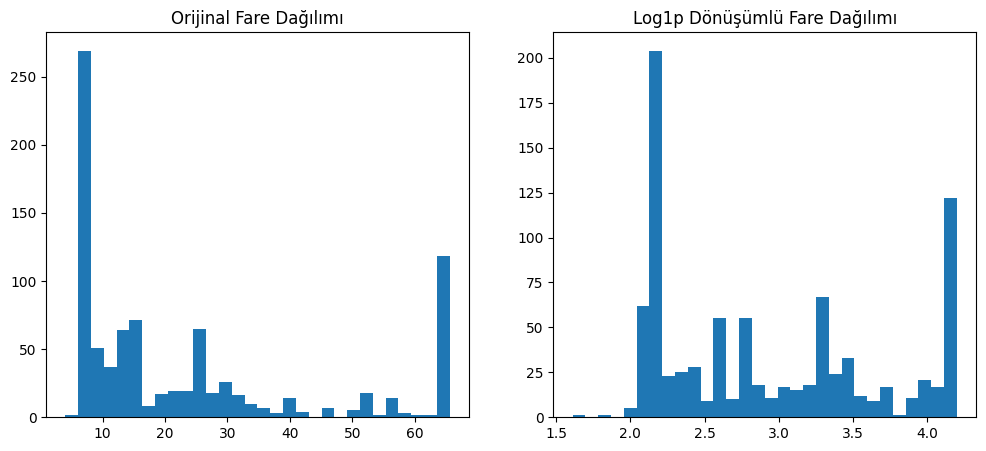

In [ ]:
import numpy as np
df['Fare_log'] = np.log1p(df['Fare'])

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(df['Fare'], bins=30)
plt.title('Orijinal Fare Dağılımı')

plt.subplot(1, 2, 2)
plt.hist(df['Fare_log'], bins=30)
plt.title('Log1p Dönüşümlü Fare Dağılımı')

plt.show()
